In [2]:
df=pd.read_csv("C:/pandas_data/Online_Retail - Online_Retail.csv")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [4]:
# What are the top 10 selling products by quantity?
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

<Axes: title={'center': 'top 10 salling products by quantity'}, xlabel='Description'>

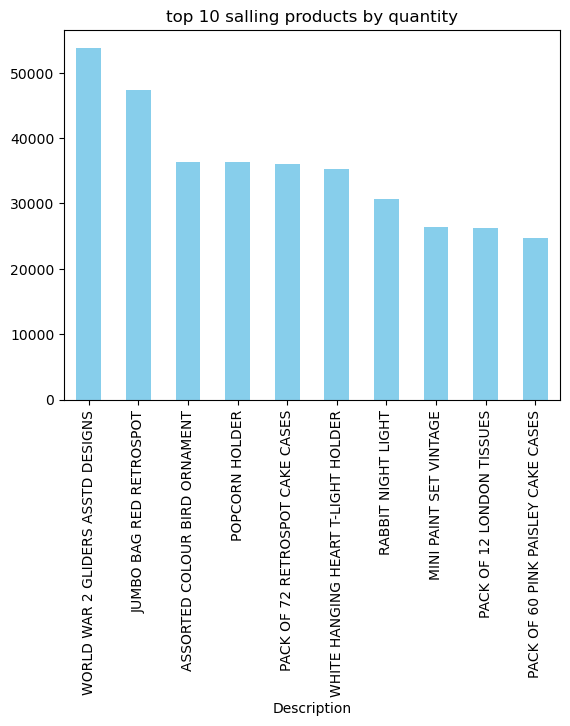

In [7]:
top_products.plot(kind="bar" ,title = "top 10 salling products by quantity" , color= "skyblue")

In [8]:
# What are the top 10 products by total revenue?

df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
top_products = df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
top_products


Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalRevenue, dtype: float64

<Axes: title={'center': 'top 10 product by Revenue'}, ylabel='Description'>

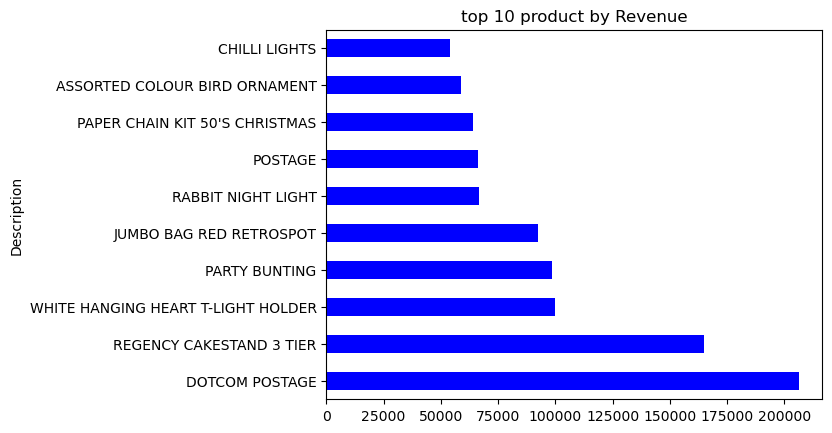

In [12]:
top_products.plot(kind ="barh" , title= "top 10 product by Revenue" , color ="blue")

In [15]:
# How does total sales vary by country?

country_sales = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
country_sales


Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: TotalRevenue, dtype: float64

Text(0.5, 1.0, 'Sales by Country')

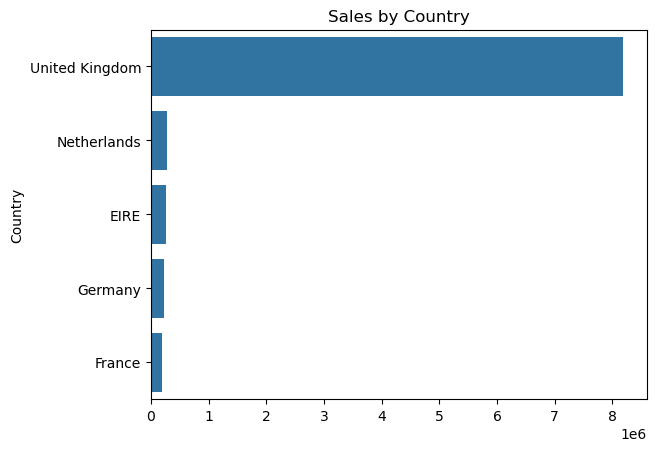

In [16]:
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Sales by Country")

C:\Users\sc024\AppData\Local\Temp\ipykernel_5008\1837906236.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


<Axes: title={'center': 'Monthly Sales Quantity'}, xlabel='Month'>

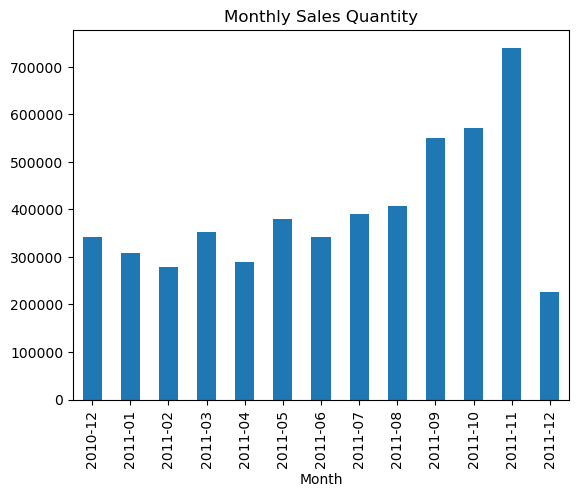

In [17]:
# which month had the highest total quantity sold ?
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales Quantity')


In [ ]:
# Compare average unit price by country